In [1]:
import tensorflow as tf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [22]:
#Hyper parameters
learning_rate = 0.005
epochs = 35
batch_size = 250

In [23]:
#NN parameters 
n_hidden_1 = 256
n_hidden_2 = 16 
image_size = 28*28
labels_size = 10

In [24]:
# Define placeholders for input data
training_data = tf.placeholder(tf.float32, [None, image_size])
labels = tf.placeholder(tf.float32, [None, labels_size])

In [33]:
#Layers using tensorflow methods
h1 = tf.layers.dense(inputs = training_data , units = n_hidden_1, use_bias = True, activation=tf.nn.relu)
dh1 = tf.layers.dropout(h1,rate=0.2,training=True)
h2 = tf.layers.dense(inputs = dh1 , units = n_hidden_2, use_bias = True, activation=tf.nn.sigmoid)
out = tf.layers.dense(inputs = h2 , units = labels_size, use_bias = True)


In [32]:
#weigths and biases definition manual
weights = {
    'h1': tf.Variable(tf.truncated_normal([image_size,n_hidden_1],stddev=0.1)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1  ,n_hidden_2],stddev=0.1)),
    'out': tf. Variable(tf.truncated_normal([n_hidden_2,labels_size],stddev=0.1))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([labels_size]))
}

In [83]:
#define the fully conected NN with two hidden layer and sigmoids as activations in each hidden layer.
def multilayer_perceptron(x):
    l_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    y_1 = tf.nn.sigmoid(l_1)
    l_2 = tf.add(tf.matmul(y_1,weights['h2']),biases['b2'])
    y_2 = tf.nn.sigmoid(l_2)
    out_l = tf.add(tf.matmul(y_2,weights['out']),biases['out'])
    return(out_l)

In [34]:
#define model
logits = out

#Cost function
costf = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels))
#optimizer
opt = tf.train.AdamOptimizer(learning_rate)
train_opt = opt.minimize(costf)

In [35]:
# Initializing the variables
init = tf.global_variables_initializer()
# Run a tensorflow Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [36]:
avg_cost_list = []
for e in range(epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        input_batch, labels_batch = mnist.train.next_batch(batch_size)
        _,c = sess.run([train_opt,costf],feed_dict = {training_data: input_batch, labels: labels_batch})
        avg_cost += c/total_batch
    avg_cost_list.append(avg_cost)
    if e % 1 == 0:
        print('Epoch: ' + str(e+1), 'cost: ' + str(avg_cost))
print('Training done!')

Epoch: 1 cost: 0.5717314199290492
Epoch: 2 cost: 0.16786971911787996
Epoch: 3 cost: 0.11854403183202844
Epoch: 4 cost: 0.09443750420415947
Epoch: 5 cost: 0.078455757535994
Epoch: 6 cost: 0.06773390745405446
Epoch: 7 cost: 0.0592785687228157
Epoch: 8 cost: 0.05383568743921142
Epoch: 9 cost: 0.052195173459635515
Epoch: 10 cost: 0.04836157597178086
Epoch: 11 cost: 0.04259225167757404
Epoch: 12 cost: 0.04068302054974167
Epoch: 13 cost: 0.04060124769298868
Epoch: 14 cost: 0.03755257352974944
Epoch: 15 cost: 0.03563686233564195
Epoch: 16 cost: 0.03776060535720636
Epoch: 17 cost: 0.034239921818318024
Epoch: 18 cost: 0.035370290342887696
Epoch: 19 cost: 0.031574168794957766
Epoch: 20 cost: 0.03228240728018466
Epoch: 21 cost: 0.029472864418163557
Epoch: 22 cost: 0.03282019824149427
Epoch: 23 cost: 0.02906035263387655
Epoch: 24 cost: 0.030176996582568703
Epoch: 25 cost: 0.030576251675798135
Epoch: 26 cost: 0.028110547804019673
Epoch: 27 cost: 0.028059713491661982
Epoch: 28 cost: 0.02910450438291

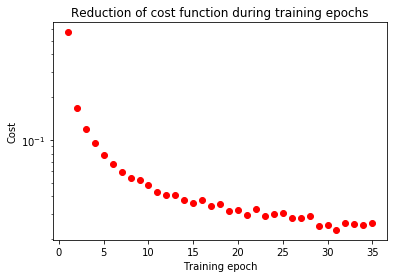

In [39]:
semilogy([(i+1) for i in range(epochs)],avg_cost_list,'ro')
title('Reduction of cost function during training epochs')

ylabel('Cost')
xlabel('Training epoch')
show()

In [40]:
# Test model
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(labels, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({training_data: mnist.test.images, labels: mnist.test.labels}))

Accuracy: 0.9715
